In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Cleaning

In [57]:
df = pd.read_csv('indian.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.384603,0.860978,0.493965,0.822754,0.576886,0.709265,0.580108,0.586559,0.500606,0.492730,...,0.099419,0.313449,0.535009,0.300326,0.406348,0.303353,0.328528,0.302761,0.239985,F
1,0.381661,0.844779,0.487710,0.815313,0.572389,0.713047,0.577791,0.603090,0.498375,0.509758,...,0.096891,0.311258,0.529822,0.296538,0.399721,0.295461,0.323711,0.294854,0.233859,F
2,0.378271,0.859713,0.487743,0.823282,0.568566,0.712624,0.571142,0.594364,0.496625,0.499186,...,0.099943,0.306600,0.531987,0.293715,0.402563,0.296717,0.324338,0.296600,0.233735,F
3,0.383238,0.852233,0.491827,0.816753,0.576109,0.706797,0.579088,0.586114,0.498264,0.497506,...,0.099086,0.310057,0.541938,0.296697,0.409914,0.298061,0.330142,0.297016,0.239368,F
4,0.377610,0.864495,0.485255,0.824827,0.566873,0.713553,0.569435,0.593201,0.493645,0.502601,...,0.106863,0.303926,0.538896,0.289195,0.408323,0.291902,0.330650,0.290826,0.242611,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.555457,0.887632,0.653579,0.861994,0.725037,0.784592,0.689021,0.692866,0.605523,0.631606,...,0.730544,0.500621,0.621289,0.532786,0.557781,0.551968,0.654347,0.558405,0.727206,V
4967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,V
4968,0.575082,0.923623,0.678110,0.901341,0.761395,0.808429,0.715157,0.707263,0.624192,0.647994,...,0.756858,0.521248,0.630752,0.561698,0.559511,0.576120,0.668154,0.575146,0.744157,V
4969,0.581612,0.849963,0.677670,0.837903,0.747141,0.773970,0.715959,0.700936,0.641448,0.649018,...,0.760095,0.521785,0.625458,0.554844,0.573513,0.578294,0.671963,0.587765,0.749845,V


In [58]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (4971, 43)


In [59]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 1419


In [60]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [61]:
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.384603,0.860978,0.493965,0.822754,0.576886,0.709265,0.580108,0.586559,0.500606,0.492730,...,0.099419,0.313449,0.535009,0.300326,0.406348,0.303353,0.328528,0.302761,0.239985,F
1,0.381661,0.844779,0.487710,0.815313,0.572389,0.713047,0.577791,0.603090,0.498375,0.509758,...,0.096891,0.311258,0.529822,0.296538,0.399721,0.295461,0.323711,0.294854,0.233859,F
2,0.378271,0.859713,0.487743,0.823282,0.568566,0.712624,0.571142,0.594364,0.496625,0.499186,...,0.099943,0.306600,0.531987,0.293715,0.402563,0.296717,0.324338,0.296600,0.233735,F
3,0.383238,0.852233,0.491827,0.816753,0.576109,0.706797,0.579088,0.586114,0.498264,0.497506,...,0.099086,0.310057,0.541938,0.296697,0.409914,0.298061,0.330142,0.297016,0.239368,F
4,0.377610,0.864495,0.485255,0.824827,0.566873,0.713553,0.569435,0.593201,0.493645,0.502601,...,0.106863,0.303926,0.538896,0.289195,0.408323,0.291902,0.330650,0.290826,0.242611,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.567181,0.923449,0.683438,0.923392,0.775879,0.821250,0.731226,0.703687,0.633126,0.638353,...,0.737536,0.527566,0.617918,0.563457,0.543501,0.586143,0.659732,0.585633,0.740077,V
4966,0.555457,0.887632,0.653579,0.861994,0.725037,0.784592,0.689021,0.692866,0.605523,0.631606,...,0.730544,0.500621,0.621289,0.532786,0.557781,0.551968,0.654347,0.558405,0.727206,V
4968,0.575082,0.923623,0.678110,0.901341,0.761395,0.808429,0.715157,0.707263,0.624192,0.647994,...,0.756858,0.521248,0.630752,0.561698,0.559511,0.576120,0.668154,0.575146,0.744157,V
4969,0.581612,0.849963,0.677670,0.837903,0.747141,0.773970,0.715959,0.700936,0.641448,0.649018,...,0.760095,0.521785,0.625458,0.554844,0.573513,0.578294,0.671963,0.587765,0.749845,V


In [62]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (3552, 43)


## Data Preparation

In [63]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3552, 42)
Labels shape = (3552,)


## Data Split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [65]:
svm = SVC(C=50, gamma=0.1, kernel='rbf')

In [66]:
svm.fit(x_train, y_train)

SVC(C=50, gamma=0.1)

In [67]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9992960225272791


In [68]:
y_pred = svm.predict(x_test)

In [69]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9929676511954993


## Visualization

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [71]:
f1, recall, precision

(0.9929676511954993, 0.9929676511954993, 0.9929676511954993)

<AxesSubplot:title={'center':'Confusion Matrix - Indian Sign Language'}>

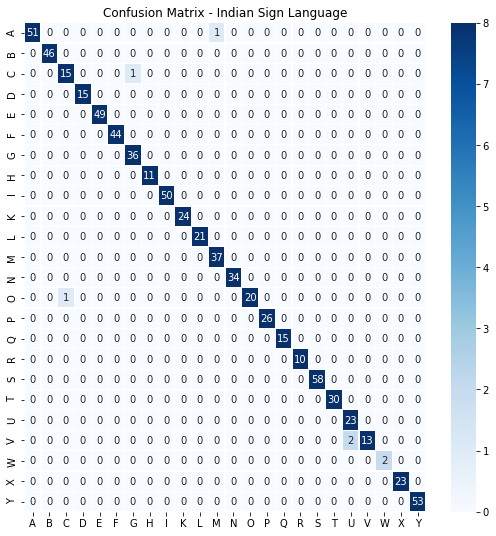

In [72]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

In [73]:
maping.figure.savefig("output.png")